In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, Model
from keras.activations import relu
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# training
epochs = 100
# LSTM
n_lstm_1 = 100
drop_lstm = 0.1
#FC
n_dense_1 = 100
n_dense_2 = 1000

In [3]:
#download from https://finance.yahoo.com/quote/DBX/history?p=DBX
dataset = pd.read_csv('DBX.csv')
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-24,23.190001,23.469999,23.01,23.389999,23.389999,1347200
1,2019-01-25,23.680000,24.100000,23.49,23.900000,23.900000,2680600
2,2019-01-28,23.629999,24.180000,23.24,24.139999,24.139999,2131600
3,2019-01-29,24.070000,24.100000,23.08,23.240000,23.240000,1723100
4,2019-01-30,23.500000,24.045000,23.33,23.930000,23.930000,1476800
5,2019-01-31,24.040001,24.990000,24.00,24.709999,24.709999,3611300
6,2019-02-01,24.549999,24.650000,23.27,24.240000,24.240000,4505100
7,2019-02-04,24.389999,24.850000,24.00,24.570000,24.570000,1697800
8,2019-02-05,24.639999,25.295000,24.49,25.200001,25.200001,3021300
9,2019-02-06,25.250000,25.440001,24.75,25.240000,25.240000,1906500


In [4]:
x = []
y = []
for i in range(dataset.shape[0]-5):
    x.append(dataset.loc[i:(i+4)]['Close'].values)
    y.append(dataset.loc[i+5]['Close'])
x = np.array(x)
y = np.array(y)

In [5]:
print(x.shape, y.shape)

(248, 5) (248,)


In [6]:
x = x.reshape(x.shape[0],x.shape[1],1)
print(x.shape)

(248, 5, 1)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20,random_state=30)

In [8]:
model = Sequential()
model.add(Dense(n_dense_1, input_shape = (5,1), activation = 'relu'))
model.add(LSTM(n_lstm_1, dropout=drop_lstm))
model.add(Dense(n_dense_2, activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5, 100)            200       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 182,601
Trainable params: 182,601
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='mean_squared_error')

In [10]:
# checkpoint
output_dir = "model_weights/stock_pred"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
filepath=output_dir+"/weights-improvement-{epoch:02d}-{loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [11]:
model.fit(X_train, Y_train, epochs=epochs, callbacks=callbacks_list, validation_data=(X_test, Y_test), verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 198 samples, validate on 50 samples
Epoch 1/100





198/198 [==============================] - 2s 8ms/step - loss: 377.8026 - val_loss: 177.5253

Epoch 00001: val_loss improved from inf to 177.52531, saving model to model_weights/stock_pred/weights-improvement-01-377.80.hdf5
Epoch 2/100
198/198 [==============================] - 0s 367us/step - loss: 89.2953 - val_loss: 21.2347

Epoch 00002: val_loss improved from 177.52531 to 21.23467, saving model to model_weights/stock_pred/weights-improvement-02-89.30.hdf5
Epoch 3/100
198/198 [==============================] - 0s 367us/step - loss: 37.8671 - val_loss: 24.4124

Epoch 00003: val_loss did not improve from 21.23467
Epoch 4/100
198/198 [==============================] - 0s 339us/step - loss: 8.6306 - val_loss: 11.1172

Epoch 00004: val_loss improved from 21.23467 to 11.11720, saving model to model_weights/stock_pred/weights-improve

198/198 [==============================] - 0s 339us/step - loss: 1.1470 - val_loss: 0.6604

Epoch 00029: val_loss did not improve from 0.51338
Epoch 30/100
198/198 [==============================] - 0s 335us/step - loss: 1.3108 - val_loss: 0.5632

Epoch 00030: val_loss did not improve from 0.51338
Epoch 31/100
198/198 [==============================] - 0s 331us/step - loss: 1.3753 - val_loss: 0.3085

Epoch 00031: val_loss improved from 0.51338 to 0.30853, saving model to model_weights/stock_pred/weights-improvement-31-1.38.hdf5
Epoch 32/100
198/198 [==============================] - 0s 318us/step - loss: 1.1081 - val_loss: 1.2318

Epoch 00032: val_loss did not improve from 0.30853
Epoch 33/100
198/198 [==============================] - 0s 317us/step - loss: 1.3809 - val_loss: 0.5669

Epoch 00033: val_loss did not improve from 0.30853
Epoch 34/100
198/198 [==============================] - 0s 330us/step - loss: 1.2822 - val_loss: 0.5531

Epoch 00034: val_loss did not improve from 0.3085


Epoch 00078: val_loss did not improve from 0.24752
Epoch 79/100
198/198 [==============================] - 0s 325us/step - loss: 0.7265 - val_loss: 0.5353

Epoch 00079: val_loss did not improve from 0.24752
Epoch 80/100
198/198 [==============================] - 0s 332us/step - loss: 0.8507 - val_loss: 0.4247

Epoch 00080: val_loss did not improve from 0.24752
Epoch 81/100
198/198 [==============================] - 0s 330us/step - loss: 0.8821 - val_loss: 0.2509

Epoch 00081: val_loss did not improve from 0.24752
Epoch 82/100
198/198 [==============================] - 0s 330us/step - loss: 0.6800 - val_loss: 0.2356

Epoch 00082: val_loss improved from 0.24752 to 0.23557, saving model to model_weights/stock_pred/weights-improvement-82-0.68.hdf5
Epoch 83/100
198/198 [==============================] - 0s 321us/step - loss: 0.7164 - val_loss: 0.3527

Epoch 00083: val_loss did not improve from 0.23557
Epoch 84/100
198/198 [==============================] - 0s 322us/step - loss: 0.7251 - va

In [12]:
prediction = model.predict(X_test)

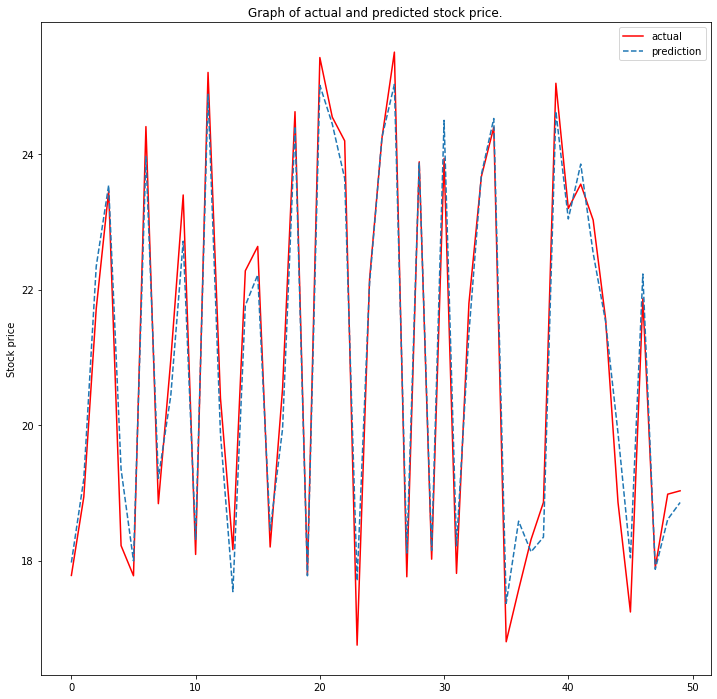

In [13]:
plt.figure(figsize=(12,12))
plt.plot(Y_test,'r',label='actual')
plt.plot(prediction,'--', label = 'prediction')

plt.title('Graph of actual and predicted stock price.')
plt.ylabel('Stock price')
plt.legend()